<a href="https://colab.research.google.com/github/Syed8855/Titanic_Dataset_Profile_Repo/blob/main/Analysis__on__netflix_content_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries
1. numpy: Used for numerical computations and array manipulation.
2. matplotlib.pyplot: Provides plotting functions for creating visualizations.
3. pandas: Used for data manipulation and analysis with DataFrames.
4. seaborn: A high-level library for creating statistical graphics.
5. WordCloud: For generating word cloud visualizations.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [47]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [48]:
netflix_dt = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")

# ** Basic Operations On Dataset using pandas Library**
operations included:
1. head()
2. tail()
3. info()

In [49]:
netflix_dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [50]:
netflix_dt.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [52]:
netflix_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Insights:
Missing Values:
1. Director: Missing in ~30% of entries (common for TV shows).
2. Cast: Missing in ~9% of entries.
3. Country: Missing in ~6.5% of entries.
4. Date Added: Missing in only 10 entries.
5. Rating: Missing in 7 entries.







# Data Cleaning and Data type conversion
1. converting columns to proper data types
2. Strategies Like:
    1. dropna() : when minute percentage of rows have missing data
    2. fillna(): Replace the missing values using statistical measures

In [112]:
#handling missing values of 'director' and 'cast'
netflix_dt['director'] = netflix_dt['director'].fillna('Unknown')
netflix_dt['cast'] = netflix_dt['cast'].fillna('Unknown')

In [56]:
#handling missing values of 'country' using statistical measure 'mode'
mode_country = netflix_dt['country'].mode()[0]
netflix_dt['country'] = netflix_dt['country'].fillna(mode_country)

In [57]:
#drop the few rows of 'date_added' and 'rating'
netflix_dt.dropna(subset=['date_added', 'rating'], inplace=True)

In [59]:
#convert the date_added to datetimeObjects
#handle variations in date format using format='mixed'
netflix_dt['date_added'] = pd.to_datetime(netflix_dt['date_added'], format ='mixed',dayfirst=False)

In [60]:
#new Features for year and month added
netflix_dt['year_added'] = netflix_dt['date_added'].dt.year
netflix_dt['month_added'] = netflix_dt['date_added'].dt.month

In [62]:
#verify missing values cleaning and transformation using isnull and sum
print('Missing Values after Cleaning')
print(netflix_dt.isnull().sum())
print('data types after transformation')
print(netflix_dt.dtypes)

Missing Values after Cleaning
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64
data types after transformation
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


# Exploratory Data Analysis And Visualization

1. What is the distribution of content type?

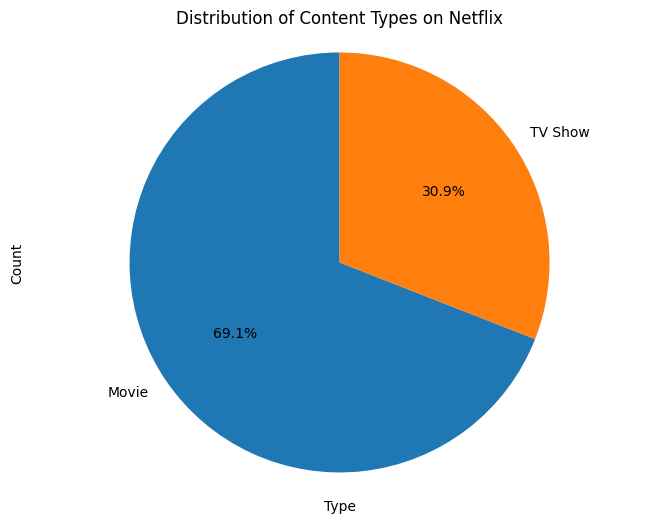

In [ ]:
plt.figure(figsize = (8,6))
type_counts = netflix_dt['type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types on Netflix')
plt.show()

**Observations:**
* The majority of content on Netflix is Movies, making up 69.1% of the dataset.
* TV Shows account for the remaining 30.9% of the content.


2. How has content been added over time?

Text(0.5, 1.0, 'Content Over Time on Netflix')

<Figure size 1000x600 with 0 Axes>

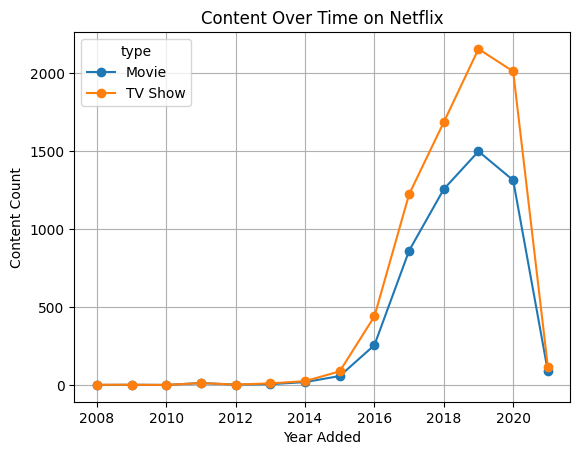

In [63]:
content_over_time = netflix_dt.groupby(['year_added','type']).size().unstack().fillna(0)
plt.figure(figsize = (10,6))
content_over_time.plot(kind = 'line', marker ='o',stacked = True)
plt.xlabel('Year Added')
plt.ylabel('Content Count')
plt.grid(True)
plt.title('Content Over Time on Netflix')

1. Overall Growth: There is a clear upward trend in the total amount of content added to Netflix over the years, particularly from 2015 onwards.
2. Peak in 2019: The graph shows a significant peak in the amount of content added in 2019, both for movies and TV shows.
3. Shift in Content Mix: While both movies and TV shows increased significantly, the number of movies added generally remained higher than TV shows until 2019, after which the gap narrowed slightly.
4. Decline in 2020 and 2021: There is a noticeable decline in the amount of content added in 2020 and a sharper drop in 2021. This could be attributed to various factors, including the COVID-19 pandemic impacting production.
5. Early Years: The graph shows very little content being added in the early years (2008-2014), indicating the platform's growth and expansion over time.

3. **What are the most popular genres?**

In [ ]:
genres = netflix_dt.assign(genres=netflix_dt['listed_in'].str.split(', ')).explode('genres')
genre_counts = genres['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts)

                           Genre  Count
0           International Movies   2437
1                         Dramas   2106
2                       Comedies   1471
3         International TV Shows   1199
4                  Documentaries    786
5             Action & Adventure    721
6                      TV Dramas    704
7             Independent Movies    673
8       Children & Family Movies    532
9                Romantic Movies    531
10                   TV Comedies    525
11                     Thrillers    491
12                Crime TV Shows    427
13                      Kids' TV    414
14                    Docuseries    353
15             Romantic TV Shows    333
16               Stand-Up Comedy    329
17              Music & Musicals    321
18                 Horror Movies    312
19              British TV Shows    232
20                    Reality TV    222
21              Sci-Fi & Fantasy    218
22                 Sports Movies    196
23               Korean TV Shows    150


Observations:
* Handling multi -value text columns
  * The listed_in columns contains strings with  multiple genre seperated by commas
* Technique followed:
  * Split the string into list of genres
  * Explode the dataFrame so that each genre in teh list gets its own row



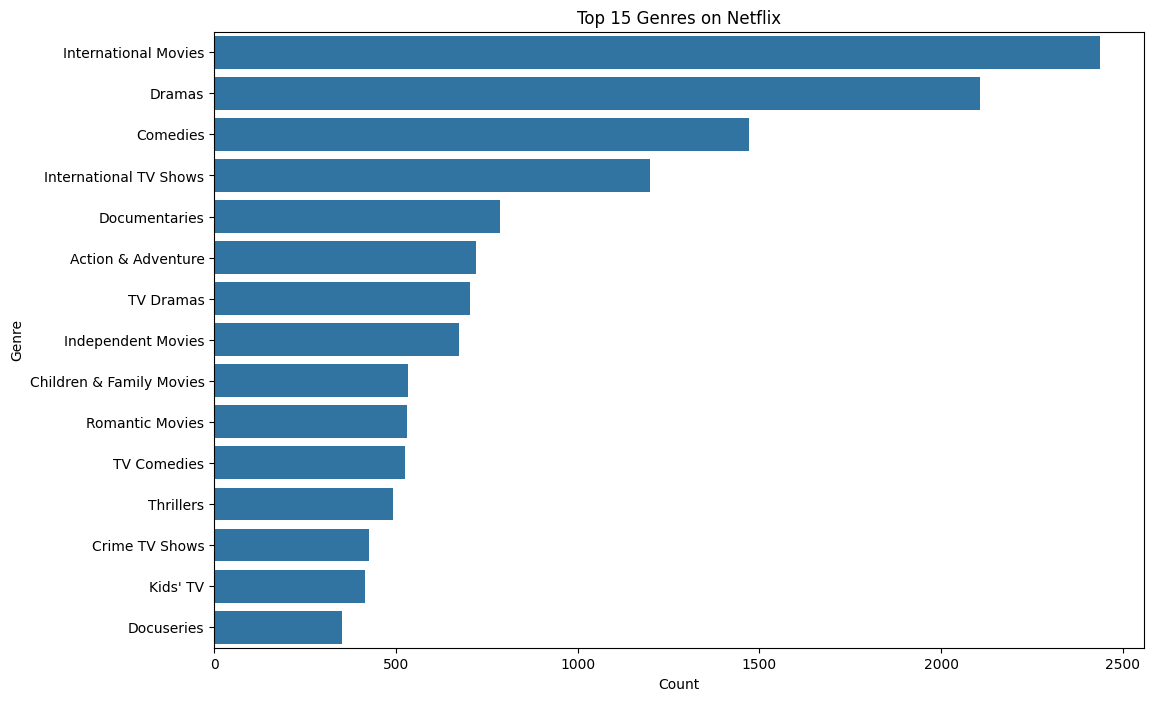

In [69]:
genre_counts = genre_counts.head(15)
plt.figure(figsize = (12,8))
sns.barplot(y= 'Genre',x = 'Count', data = genre_counts,legend = False)
plt.ylabel('Genre')
plt.xlabel('Count')
plt.title('Top 15 Genres on Netflix')
plt.show()

Insight:
The bar plot shows that "International Movies," "Dramas," and "Comedies" are the top three most popular genres on Netflix, followed by "International TV Shows.

4. What is the distribution of content duration?

In [74]:
movie_df = netflix_dt[netflix_dt['type'] == 'Movie'].copy()
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Unknown,Unknown,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Unknown,Unknown,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Unknown,Unknown,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Unknown,Unknown,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
6,s7,Movie,122,Unknown,Unknown,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6


In [75]:
tvshow_df = netflix_dt[netflix_dt['type'] == 'TV Show'].copy()
tvshow_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,Unknown,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
5,s6,TV Show,46,Unknown,Unknown,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7
11,s12,TV Show,1983,Unknown,Unknown,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11
12,s13,TV Show,1994,Unknown,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5
16,s17,TV Show,Feb-09,Unknown,Unknown,United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3


In [76]:
#clean and converting duration for movies
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)

In [77]:
tvshow_df['seasons'] = tvshow_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

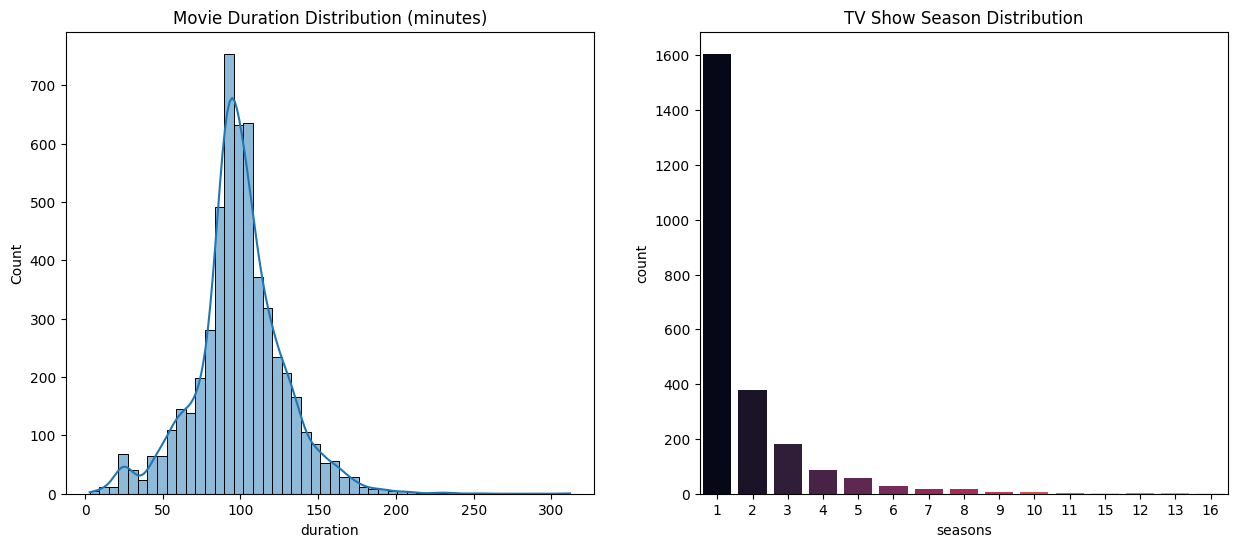

In [78]:
fig,axes = plt.subplots(1,2,figsize = (15,6))
sns.histplot(ax=axes[0], data=movie_df, x='duration', bins=50, kde=True).set_title('Movie Duration Distribution (minutes)')

sns.countplot(ax=axes[1], x='seasons', data=tvshow_df, palette='rocket', order=tvshow_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

Insight:
The histogram shows that most movies on Netflix are between 80 and 100 minutes long, with a right-skewed distribution. The countplot reveals that the majority of TV shows on Netflix have only one season, with significantly fewer shows having multiple seasons.

5. Where does the content come from (Geographical Analysis)

In [79]:
countries = netflix_dt.assign(country = netflix_dt['country'].str.split(', ')).explode('country')
country_counts = countries['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

<Axes: xlabel='Count', ylabel='Country'>

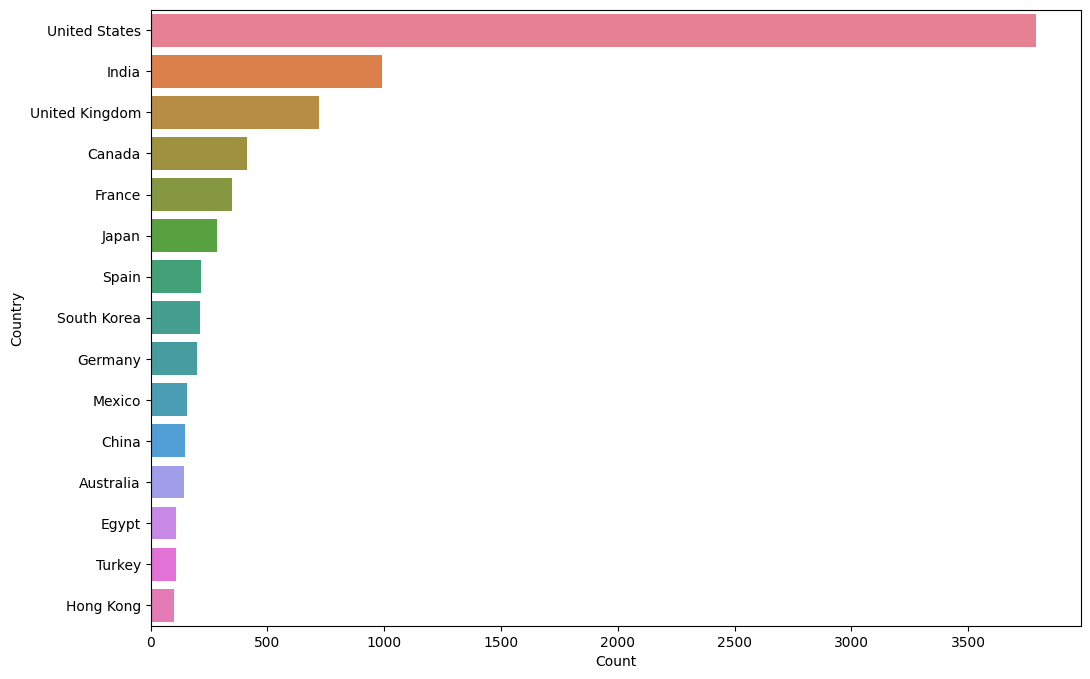

In [82]:
countries_plot = country_counts.head(15)
plt.figure(figsize = (12,8))
sns.barplot(y = 'Country', x = 'Count', data = countries_plot, hue = 'Country',legend = False)

Insight:
The bar plot shows that the United States has the most content on Netflix by a large margin, followed by India, the United Kingdom, Canada, and France.


6. What are the maturity ratings of the content?

Text(0.5, 1.0, 'Content Maturity Ratings on Netflix')

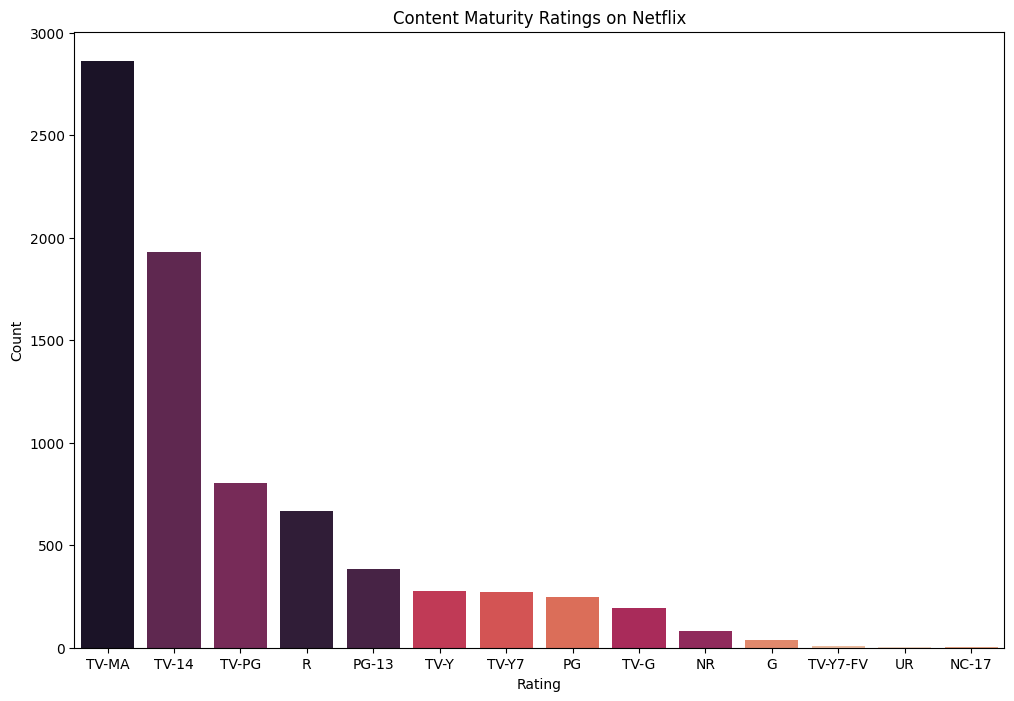

In [88]:
rating_counts = netflix_dt['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts = rating_counts.head(15)
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=netflix_dt, palette='rocket', order=rating_counts['Rating'],hue ='rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Content Maturity Ratings on Netflix')

Insight: The countplot shows that the most common maturity rating on Netflix is TV-MA, followed by TV-14 and TV-PG, indicating a large portion of content is for mature audiences.

# Feature Engineering -content Freshness
  * creating a new feature to analyze how old content is when it gets added to Netflix.

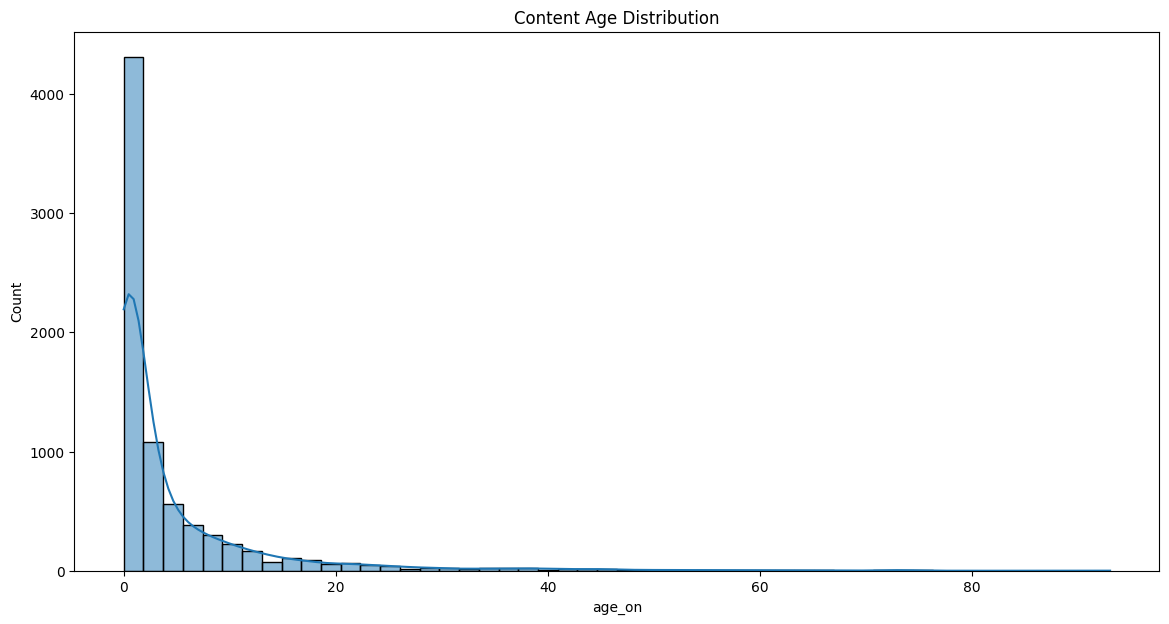

In [89]:
netflix_dt['age_on'] = netflix_dt['year_added'] - netflix_dt['release_year']
content_age = netflix_dt[netflix_dt['age_on']>=0]
plt.figure(figsize=(14,7))
sns.histplot(data=content_age, x='age_on', bins=50, kde=True).set_title('Content Age Distribution')
plt.show()


Insight:
The histogram shows that a large majority of content added to Netflix is released in the same year it is added, with a sharp decrease in the number of titles as the content age increases, indicating a focus on newer content.

# Deeper Multivariate Analysis


In [91]:
top_genre = genres['genres'].value_counts().index[:5]
genre_movies = netflix_dt[(netflix_dt['type'] == 'Movie') & (netflix_dt['listed_in'].isin(top_genre))].copy()
genre_movies['duration'] = genre_movies['duration'].str.replace(' min', '').astype(int)

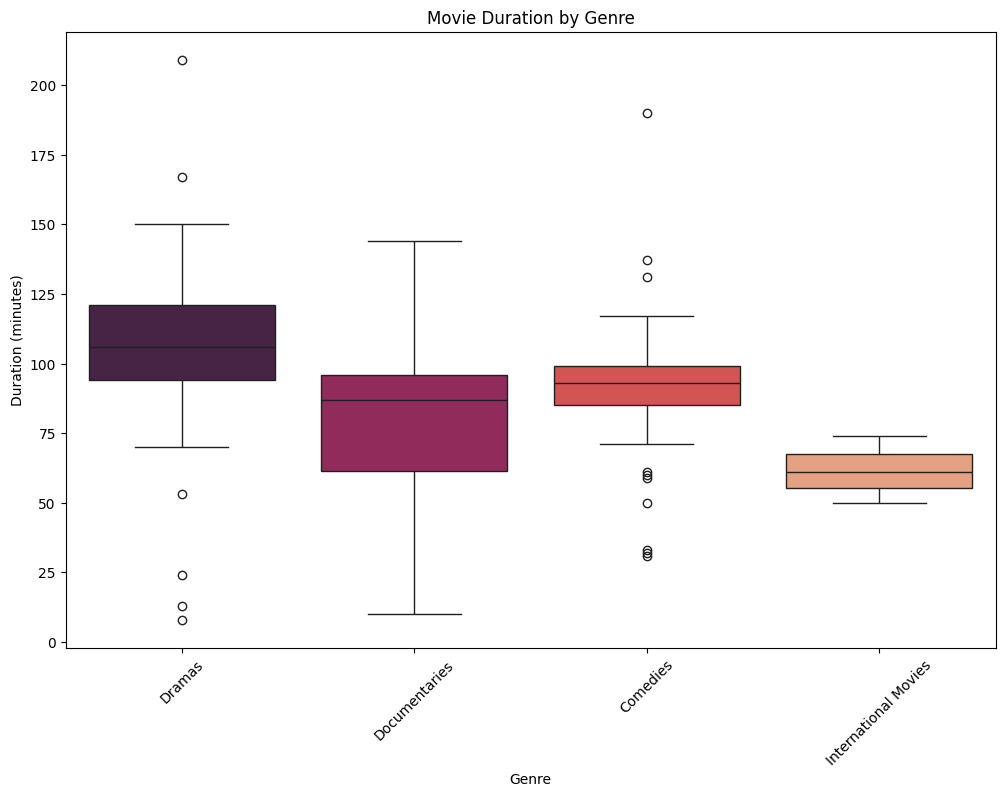

In [94]:
genre_movies = genre_movies.assign(genres=genre_movies['listed_in'].str.split(', ')).explode('genres')
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='duration', hue ='genres' , data=genre_movies, palette='rocket', legend=False)
plt.title('Movie Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Insight:
The boxplot shows that Dramas and Comedies generally have longer and more variable durations compared to Documentaries and International Movies.

# WordCloud from Content Descriptions

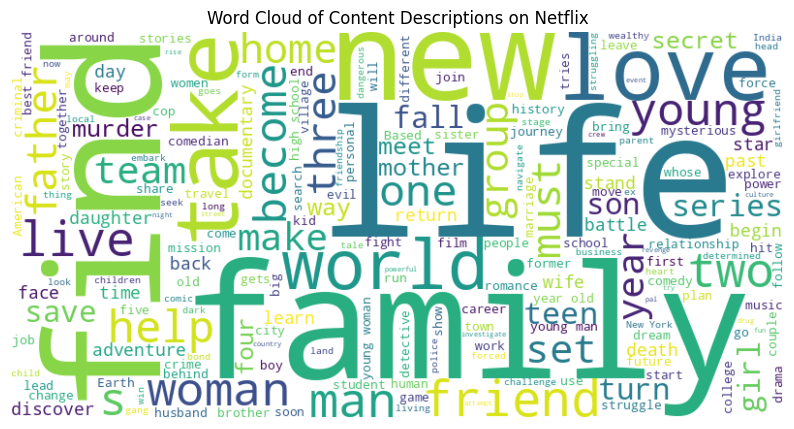

In [95]:
text =' '.join(netflix_dt['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions on Netflix')
plt.show()

Insight:
The word cloud of content descriptions highlights frequent terms like "life," "world," "family," "story," and "love," suggesting common themes around personal relationships, human experiences, and narratives in Netflix content.

# Conclusion and Summary of the insights
The analysis of the Netflix content dataset reveals several interesting insights into the platform's library:

* Content Type: Netflix primarily features Movies, which make up a significantly larger portion of the content compared to TV Shows.
* Content Growth Over Time: The platform has shown a strong growth trend in adding content over the years, with a notable peak in 2019, followed by a decline in 2020 and 2021.
* Popular Genres: The most popular genres on Netflix are International Movies, Dramas, and Comedies, indicating a diverse content offering with a strong emphasis on these categories.
* Content Duration: Movie durations typically range between 80 and 100 minutes, while most TV shows are limited to a single season, suggesting different consumption patterns for these content types.
* Geographical Distribution: The United States is the dominant country in terms of content origin, followed by countries like India and the United Kingdom, highlighting the platform's global reach but also its strong US base.
* Maturity Ratings: A large portion of the content is geared towards mature audiences, with TV-MA being the most prevalent rating.
* Content Freshness: Netflix prioritizes adding newer content, with a majority of titles being added in the same year they were released.
* Content Themes: Word cloud analysis of descriptions suggests common themes around personal relationships, human experiences, and narratives.


Overall, the analysis provides a snapshot of the Netflix content library, highlighting its diversity in genres and geographical origins, its focus on newer content, and the prevalence of mature-rated titles, while also showing trends in content addition over time.

# Submission Questions

1. How has the distribution of content ratings changed over time?


<Figure size 1400x800 with 0 Axes>

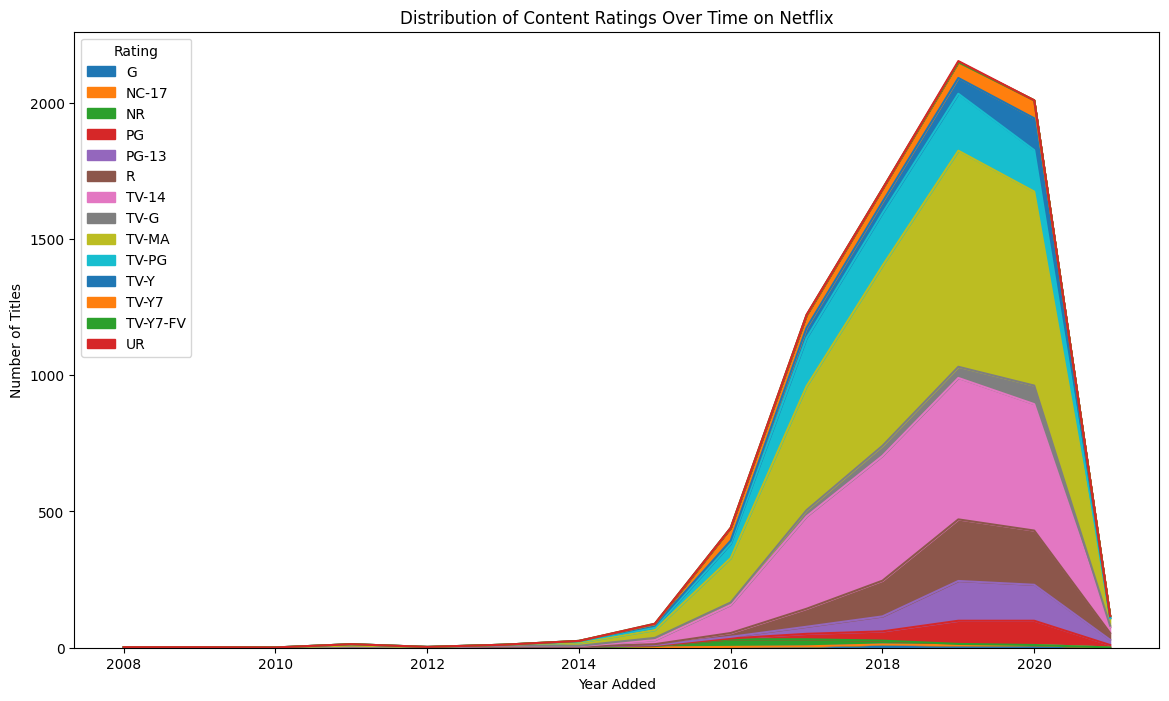

In [98]:
# Group by year added and rating, then unstack to get ratings as columns
ratings_over_time = netflix_dt.groupby(['year_added', 'rating']).size().unstack().fillna(0)

# Plotting the distribution of ratings over time
plt.figure(figsize=(14, 8))
ratings_over_time.plot(kind='area', stacked=True, figsize=(14, 8))
plt.title('Distribution of Content Ratings Over Time on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.show()

Insight:The stacked area plot shows a significant increase in content across all ratings over time, with TV-MA and TV-14 consistently dominating, peaking around 2019 before a recent decline.



2. Is there a relationship between content age and its type(movie vs Tv shows)?

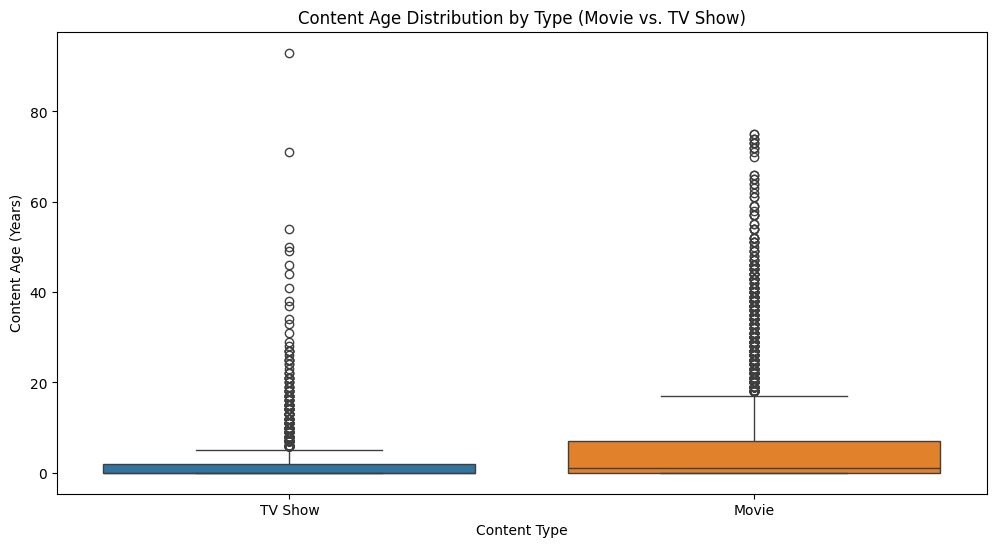

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='age_on', data=content_age, hue ='type')
plt.title('Content Age Distribution by Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()

Insight:The boxplot shows that TV shows added to Netflix are predominantly very new (age close to 0), while movies are also largely new but with a slightly wider distribution of ages and more older outliers.


3. Can we identify any trends in content production based on the release year vs the year added to the netflix

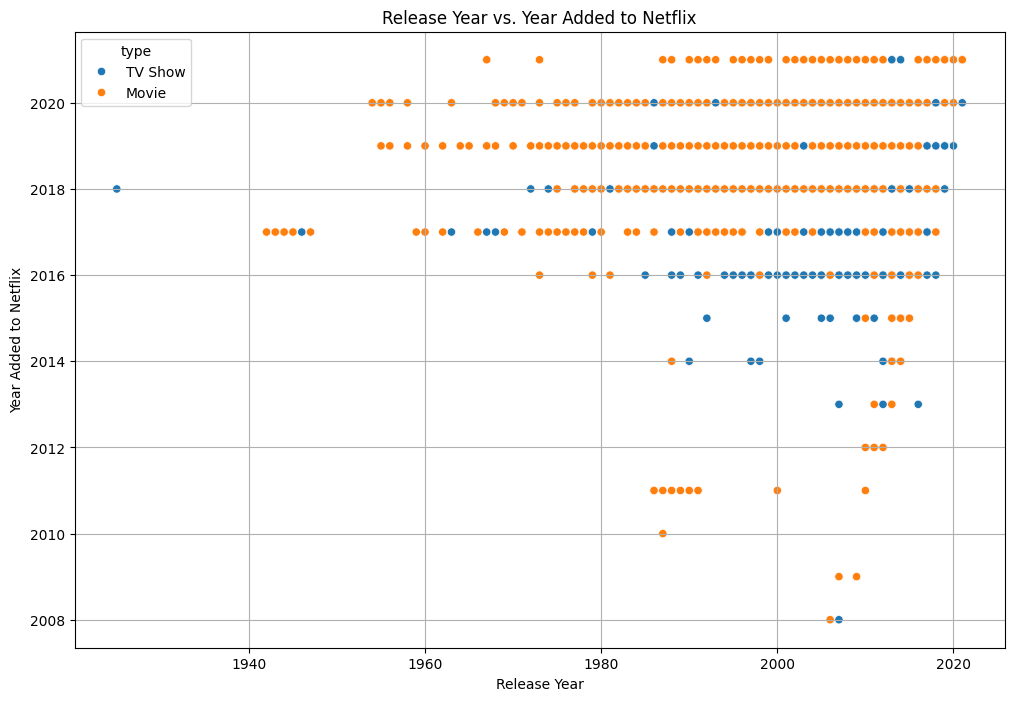

In [102]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='year_added', data=netflix_dt, hue='type')
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()

Insight:The scatter plot reveals a strong trend of Netflix adding content shortly after its release, particularly for TV shows, while also consistently adding a larger volume of older movies compared to TV shows, reflecting a focus on both new and older film content.





4. What are the most common word pairs or phrases in content descriptions?

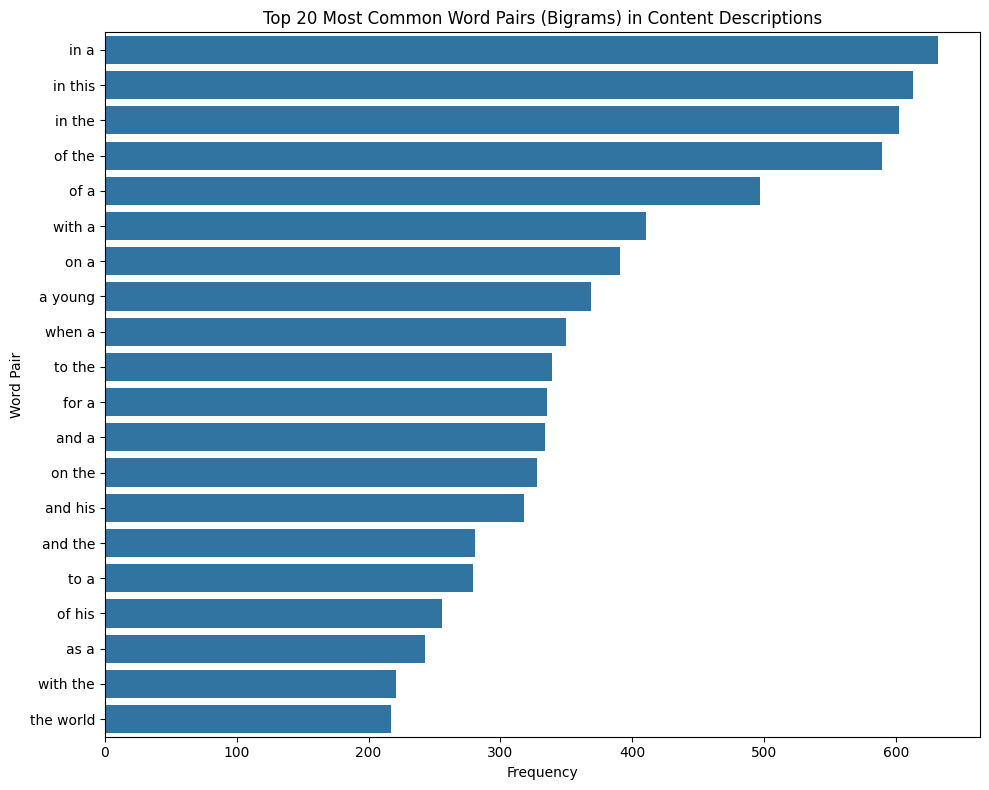

In [108]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all descriptions into a single string and convert to lowercase
all_descriptions_lower = ' '.join(netflix_dt['description'].dropna()).lower()

# Remove punctuation (keeping spaces) and split into words
words = re.findall(r'\b\w+\b', all_descriptions_lower)

# Create a list to store word pairs (bigrams)
bigrams = []

# Iterate through the words and create bigrams
for i in range(len(words) - 1):
    bigrams.append((words[i], words[i+1]))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Get the top N most common bigrams and their counts
N = 20  # You can change N
top_ngrams = bigram_counts.most_common(N)

# Convert the top n-grams into a pandas DataFrame for easy plotting
ngram_df = pd.DataFrame(top_ngrams, columns=['Bigram', 'Count'])

# Convert the 'Bigram' tuples to strings for plotting
ngram_df['Bigram'] = ngram_df['Bigram'].apply(lambda x: ' '.join(x))

# Plot the top N most common bigrams
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Bigram', data=ngram_df)
plt.title(f'Top {N} Most Common Word Pairs (Bigrams) in Content Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word Pair')
plt.tight_layout()
plt.show()

Insights:The bar plot of common word pairs in content descriptions is dominated by frequent grammatical combinations like "in a," "in this," and "in the," along with a few slightly more descriptive pairs like "a young" and "the world."


5. Who are the top directors on Netflix?

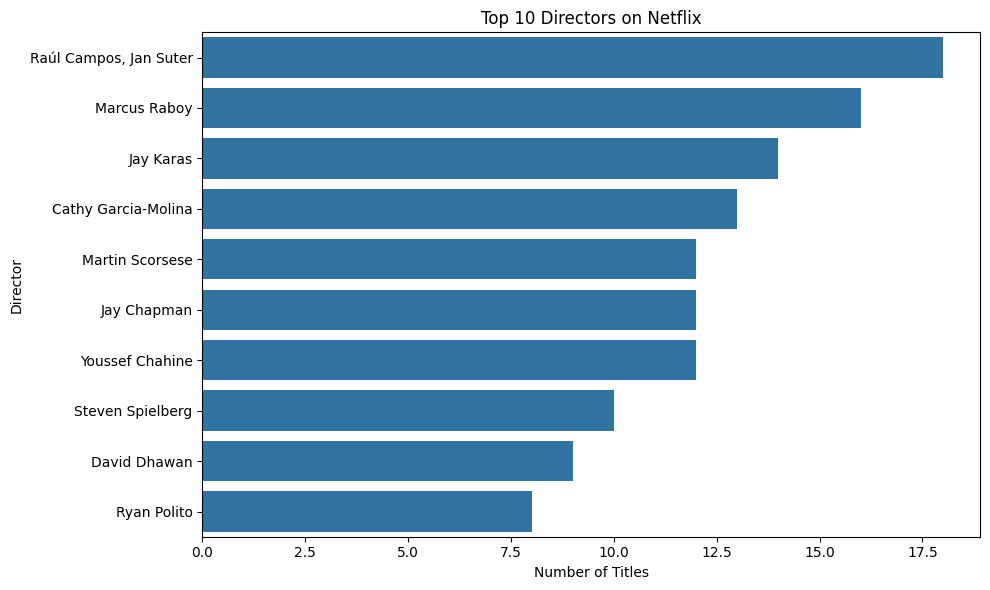

In [114]:
# Create a copy of the original DataFrame before director cleaning
netflix_dt_original_directors = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")

# Handle missing values in the director column by dropping rows with NaN for this specific analysis
director_df = netflix_dt_original_directors.dropna(subset=['director']).copy()

# Count the number of titles for each director
director_counts = director_df['director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']

# Get the top N directors
N = 10  # You can change N
top_directors = director_counts.head(N)

# Plot the top N directors
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Director', data=top_directors)
plt.title(f'Top {N} Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

Insight:
The bar plot of top directors shows that Raúl Campos and Jan Suter have the most titles (18), followed by Marcus Raboy (16) and Jay Karas (14), indicating their significant contribution to Netflix's content library, alongside other notable directors like Martin Scorsese and Steven Spielberg